In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x if isinstance(x, list) else None)

In [3]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

#Only get Data Jobs from US
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

#Drop NaN values from the column for plotting
df_US = df_US.dropna(subset=['salary_year_avg'])


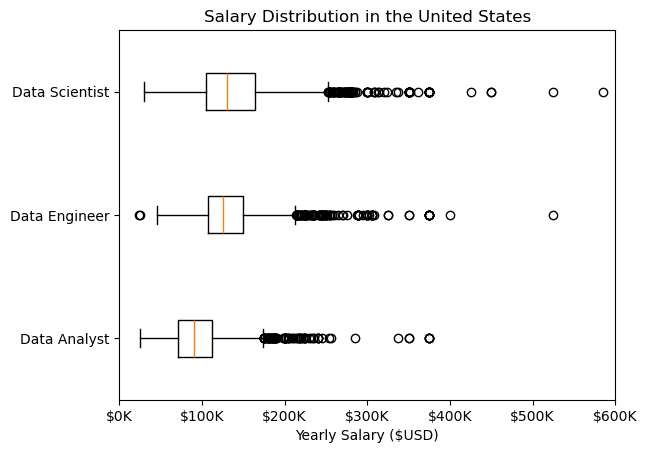

In [35]:
job_list = [(df_US[df_US['job_title_short'] == job_title]['salary_year_avg']) for job_title in job_titles]

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
 
plt.boxplot(job_list, tick_labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.xlim(0,600000)
plt.show()